In [1]:
%matplotlib inline
import sys
print(sys.version)
import numpy as np
print(np.__version__)
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt
import csv

3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 12:04:33) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
1.14.0
0.22.0


In [94]:
#for this Analysis Bechdel Ratings vs IMDB Ratings, I am using the file bechdel_titlebasics_ratings.csv.  FileJoining.ipynb shows the work for how this file is created.  
ratings_df = pd.read_csv('../Data/bechdel_titlebasics_ratings.csv', index_col = 0)

In [163]:
#for this Analysis Bechdel Ratings vs Movie Runtime, I am using the file bechdel_titlebasics.csv.  FileJoining.ipynb shows the work for how this file is created.  
runtime_df = pd.read_csv('../Data/bechdel_titlebasics.csv', index_col = 0)

## Bechdel vs IMDB Average Ratings Analysis

In [96]:
ratings_df.head()

,bechdel_id,imdb_id,rating,title,release_yr,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,5433,tt0000003,0,Pauvre Pierrot,1892,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.6,978
1,6199,tt0000012,0,"Arrival of a Train, The",1896,short,The Arrival of a Train,L'arrivée d'un train à La Ciotat,0,1896,\N,1,"Documentary,Short",7.4,8327
2,5444,tt0000014,0,Tables Turned on the Gardener,1895,short,Tables Turned on the Gardener,L'arroseur arrosé,0,1895,\N,1,"Comedy,Short",7.2,3634
3,4982,tt0000091,0,"House of the Devil, The",1896,short,The House of the Devil,Le manoir du diable,0,1896,\N,3,"Horror,Short",6.7,2094
4,5406,tt0000131,0,Une nuit terrible,1896,short,A Terrible Night,Une nuit terrible,0,1896,\N,1,"Comedy,Horror,Short",5.8,799


In [97]:
ratings_df.groupby('titleType').sum()

,bechdel_id,rating,release_yr,isAdult,startYear,averageRating,numVotes
titleType,,,,,,,
movie,28795959,15505,14306162,1,14306134,48021.4,531942791
short,574024,42,207574,0,207576,697.8,287482
tvEpisode,207549,77,72072,0,72072,247.0,143232
tvMiniSeries,114686,77,59932,0,59932,228.2,715820
tvMovie,889237,456,362788,0,362785,1118.9,1044409
tvSeries,229362,103,80344,0,80342,310.0,2703945
tvShort,3290,3,1987,0,1987,6.6,220
tvSpecial,13683,2,3990,0,3990,13.7,7550
video,556029,302,256800,1,256803,756.1,1034608


In [98]:
#like the rest of analysis, we only care about movies and tvMovies, so we will filter out the rest. 
ratings_df = ratings_df[(ratings_df.titleType == 'movie')|(ratings_df.titleType == 'tvMovie')]
#check filter done properly:
ratings_df.groupby('titleType').sum()

,bechdel_id,rating,release_yr,isAdult,startYear,averageRating,numVotes
titleType,,,,,,,
movie,28795959,15505,14306162,1,14306134,48021.4,531942791
tvMovie,889237,456,362788,0,362785,1118.9,1044409


In [99]:
#also to make this more appropriate, i am going to remove the Adult film:
ratings_df = ratings_df[ratings_df.isAdult == 0]
#check filter done properly:
ratings_df.groupby('titleType').sum()

,bechdel_id,rating,release_yr,isAdult,startYear,averageRating,numVotes
titleType,,,,,,,
movie,28789148,15502,14304190,0,14304162,48016.2,531936856
tvMovie,889237,456,362788,0,362785,1118.9,1044409


In [100]:
#now I will remove all of the columns that i don't need for the analysis
ratings_df.drop(['bechdel_id', 'imdb_id', 'title', 'release_yr', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes' ,'genres'], axis = 1, inplace=True)

In [101]:
ratings_df.head(20)

,rating,averageRating,numVotes
21,1,6.3,462
23,2,5.1,372
27,2,6.0,163
28,2,6.7,19343
29,3,6.5,460
30,0,8.0,12140
31,3,6.2,317
33,3,6.8,1145
34,2,7.2,90
35,3,7.0,706


In [102]:
#rename the column headers to avoid confusion.  rating = Bechdel_Rating, averageRating = IMDB_Rating
ratings_df.columns = ['Bechdel_Rating', 'IMDB_Rating', 'numVotes']
ratings_df.head(20)

,Bechdel_Rating,IMDB_Rating,numVotes
21,1,6.3,462
23,2,5.1,372
27,2,6.0,163
28,2,6.7,19343
29,3,6.5,460
30,0,8.0,12140
31,3,6.2,317
33,3,6.8,1145
34,2,7.2,90
35,3,7.0,706


In [103]:
#before plotting, let's group IMDB ratings by increments of 0.5:
import math
def rating_group(rating):
    return math.floor(rating/0.5) * 0.5
ratings_df['IMDB_Ratings_Group'] = ratings_df.IMDB_Rating.apply(rating_group)

In [104]:
#also adding a count column to count the number of movies when groupings are applied:
ratings_df['Movies_Count'] = 1

In [105]:
ratings_df.head(20)

,Bechdel_Rating,IMDB_Rating,numVotes,IMDB_Ratings_Group,Movies_Count
21,1,6.3,462,6.0,1
23,2,5.1,372,5.0,1
27,2,6.0,163,6.0,1
28,2,6.7,19343,6.5,1
29,3,6.5,460,6.5,1
30,0,8.0,12140,8.0,1
31,3,6.2,317,6.0,1
33,3,6.8,1145,6.5,1
34,2,7.2,90,7.0,1
35,3,7.0,706,7.0,1


In [133]:
#while we are analyzing Bechdel ratings vs IMDB ratings, we know that some movies do not have the same number of votes as others, let's take a look at the numVotes distribution:
ratings_df.numVotes.describe()

count    7.349000e+03
mean     7.252433e+04
std      1.411018e+05
min      6.000000e+00
25%      4.292000e+03
50%      1.984800e+04
75%      7.704800e+04
max      1.973406e+06
Name: numVotes, dtype: float64

(array([5.847e+03, 7.630e+02, 3.200e+02, 1.690e+02, 7.900e+01, 6.200e+01,
        3.600e+01, 2.200e+01, 1.400e+01, 1.000e+01, 9.000e+00, 4.000e+00,
        3.000e+00, 2.000e+00, 3.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00]),
 array([6.000000e+00, 9.867600e+04, 1.973460e+05, 2.960160e+05,
        3.946860e+05, 4.933560e+05, 5.920260e+05, 6.906960e+05,
        7.893660e+05, 8.880360e+05, 9.867060e+05, 1.085376e+06,
        1.184046e+06, 1.282716e+06, 1.381386e+06, 1.480056e+06,
        1.578726e+06, 1.677396e+06, 1.776066e+06, 1.874736e+06,
        1.973406e+06]),
 <a list of 20 Patch objects>)

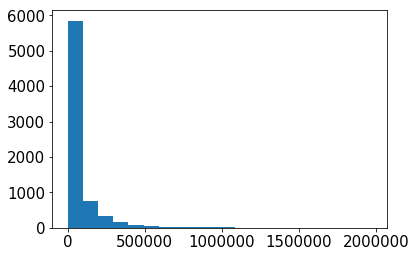

In [107]:
plt.hist(ratings_df.numVotes, bins = 20)

In [108]:
#my plan is to run the analysis on the entire data set, but also to run the analysis on data subsets based on number of votes.  Here is how I will split them:
#ratings_df is all of the data
#ratings_df_01 is all data with numVotes zscore <=1
#ratings_df_12 is all data with numVotes zscore >1 and <=2
#ratings_df_23 is all data with numvotes zscore >2 and <=3
#ratings_df_3 is all data with numVotes zscore >4

#create a column for numVotes zscore in absolute value:
zscore = lambda x: (x-ratings_df.numVotes.mean())/ratings_df.numVotes.std()
ratings_df['numVotes_zScore'] = ratings_df.numVotes.apply(zscore) 

(array([5.847e+03, 7.630e+02, 3.200e+02, 1.690e+02, 7.900e+01, 6.200e+01,
        3.600e+01, 2.200e+01, 1.400e+01, 1.000e+01, 9.000e+00, 4.000e+00,
        3.000e+00, 2.000e+00, 3.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00]),
 array([-0.51394321,  0.18533902,  0.88462126,  1.58390349,  2.28318572,
         2.98246795,  3.68175018,  4.38103241,  5.08031464,  5.77959687,
         6.47887911,  7.17816134,  7.87744357,  8.5767258 ,  9.27600803,
         9.97529026, 10.67457249, 11.37385472, 12.07313696, 12.77241919,
        13.47170142]),
 <a list of 20 Patch objects>)

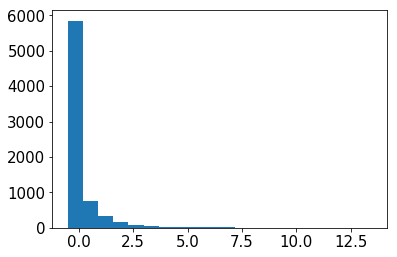

In [109]:
plt.hist(ratings_df.numVotes_zScore, bins = 20)

In [110]:
ratings_df.numVotes_zScore.describe()

count    7.349000e+03
mean    -1.858026e-16
std      1.000000e+00
min     -5.139432e-01
25%     -4.835680e-01
50%     -3.733214e-01
75%      3.205965e-02
max      1.347170e+01
Name: numVotes_zScore, dtype: float64

In [111]:
#since all negative z scores are > -1, ratings_df_01 will be created with zscore <=1:
ratings_df_01 = ratings_df[ratings_df.numVotes_zScore<= 1.0]
ratings_df_12 = ratings_df[(ratings_df.numVotes_zScore>1.0) & (ratings_df.numVotes_zScore<=2.0)]
ratings_df_23 = ratings_df[(ratings_df.numVotes_zScore>2.0) & (ratings_df.numVotes_zScore<=3.0)]
ratings_df_3 = ratings_df[ratings_df.numVotes_zScore>3.0]

In [112]:
#print shapes for checking the subsets:
print(ratings_df.shape)
print(ratings_df_01.shape)
print(ratings_df_12.shape)
print(ratings_df_23.shape)
print(ratings_df_3.shape)

(7349, 6)
(6699, 6)
(340, 6)
(141, 6)
(169, 6)


In [113]:
ratings_table = ratings_df.groupby(['IMDB_Ratings_Group','Bechdel_Rating'])['Movies_Count'].sum().unstack('Bechdel_Rating')
ratings_table.head(20)

Bechdel_Rating,0,1,2,3
IMDB_Ratings_Group,,,,
1.0,NaN,NaN,NaN,2.0
1.5,NaN,NaN,NaN,4.0
2.0,1.0,2.0,2.0,8.0
2.5,NaN,3.0,NaN,12.0
3.0,3.0,6.0,3.0,17.0
3.5,1.0,10.0,4.0,44.0
4.0,7.0,14.0,10.0,58.0
4.5,15.0,18.0,16.0,128.0
5.0,22.0,57.0,30.0,227.0


In [114]:
#fill the NaN values with 0:
ratings_table = ratings_table.fillna(0.)
ratings_table.columns = ['0','1','2','3']
ratings_table.rename_axis('IMDB_Ratings').rename_axis('Bechdel_Ratings', axis='columns')
ratings_table.head(20)

,0,1,2,3
IMDB_Ratings_Group,,,,
1.0,0.0,0.0,0.0,2.0
1.5,0.0,0.0,0.0,4.0
2.0,1.0,2.0,2.0,8.0
2.5,0.0,3.0,0.0,12.0
3.0,3.0,6.0,3.0,17.0
3.5,1.0,10.0,4.0,44.0
4.0,7.0,14.0,10.0,58.0
4.5,15.0,18.0,16.0,128.0
5.0,22.0,57.0,30.0,227.0


In [115]:
#grouping the subsets created based on zscore:
ratings_table_01 = ratings_df_01.groupby(['IMDB_Ratings_Group','Bechdel_Rating'])['Movies_Count'].sum().unstack('Bechdel_Rating')
ratings_table_01 = ratings_table_01.fillna(0.)
ratings_table_01.head(20)

Bechdel_Rating,0,1,2,3
IMDB_Ratings_Group,,,,
1.0,0.0,0.0,0.0,2.0
1.5,0.0,0.0,0.0,4.0
2.0,1.0,2.0,2.0,8.0
2.5,0.0,3.0,0.0,12.0
3.0,3.0,6.0,3.0,17.0
3.5,1.0,10.0,4.0,44.0
4.0,7.0,14.0,10.0,57.0
4.5,15.0,18.0,16.0,127.0
5.0,22.0,57.0,30.0,226.0


In [116]:
ratings_table_12 = ratings_df_12.groupby(['IMDB_Ratings_Group','Bechdel_Rating'])['Movies_Count'].sum().unstack('Bechdel_Rating')
ratings_table_12 = ratings_table_12.fillna(0.)
ratings_table_12.head(20)

Bechdel_Rating,0,1,2,3
IMDB_Ratings_Group,,,,
4.0,0.0,0.0,0.0,1.0
4.5,0.0,0.0,0.0,1.0
5.5,0.0,6.0,2.0,4.0
6.0,2.0,6.0,3.0,13.0
6.5,7.0,24.0,9.0,25.0
7.0,8.0,28.0,10.0,59.0
7.5,9.0,29.0,7.0,43.0
8.0,7.0,13.0,4.0,17.0
8.5,1.0,1.0,0.0,1.0


In [117]:
#ratings_table_12 is missing rows compared to ratings_table, and ratings_table_01.  Going to re-index and fill in 0
full_index = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0]
ratings_table_12 = ratings_table_12.reindex(full_index, fill_value = 0.)
ratings_table_12.head(20)

Bechdel_Rating,0,1,2,3
IMDB_Ratings_Group,,,,
1.0,0.0,0.0,0.0,0.0
1.5,0.0,0.0,0.0,0.0
2.0,0.0,0.0,0.0,0.0
2.5,0.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,0.0
3.5,0.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,1.0
4.5,0.0,0.0,0.0,1.0
5.0,0.0,0.0,0.0,0.0


In [118]:
ratings_table_23 = ratings_df_23.groupby(['IMDB_Ratings_Group','Bechdel_Rating'])['Movies_Count'].sum().unstack('Bechdel_Rating')
ratings_table_23 = ratings_table_23.fillna(0.)
ratings_table_23 = ratings_table_23.reindex(full_index, fill_value = 0.)
ratings_table_23.head(20)

Bechdel_Rating,0,1,2,3
IMDB_Ratings_Group,,,,
1.0,0.0,0.0,0.0,0.0
1.5,0.0,0.0,0.0,0.0
2.0,0.0,0.0,0.0,0.0
2.5,0.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,0.0
3.5,0.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,0.0
4.5,0.0,0.0,0.0,0.0
5.0,0.0,0.0,0.0,1.0


In [119]:
ratings_table_3 = ratings_df_3.groupby(['IMDB_Ratings_Group','Bechdel_Rating'])['Movies_Count'].sum().unstack('Bechdel_Rating')
ratings_table_3 = ratings_table_3.fillna(0.)
ratings_table_3 = ratings_table_3.reindex(full_index, fill_value = 0.)
ratings_table_3.head(20)

Bechdel_Rating,0,1,2,3
IMDB_Ratings_Group,,,,
1.0,0.0,0.0,0.0,0.0
1.5,0.0,0.0,0.0,0.0
2.0,0.0,0.0,0.0,0.0
2.5,0.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,0.0
3.5,0.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,0.0
4.5,0.0,0.0,0.0,0.0
5.0,0.0,0.0,0.0,0.0


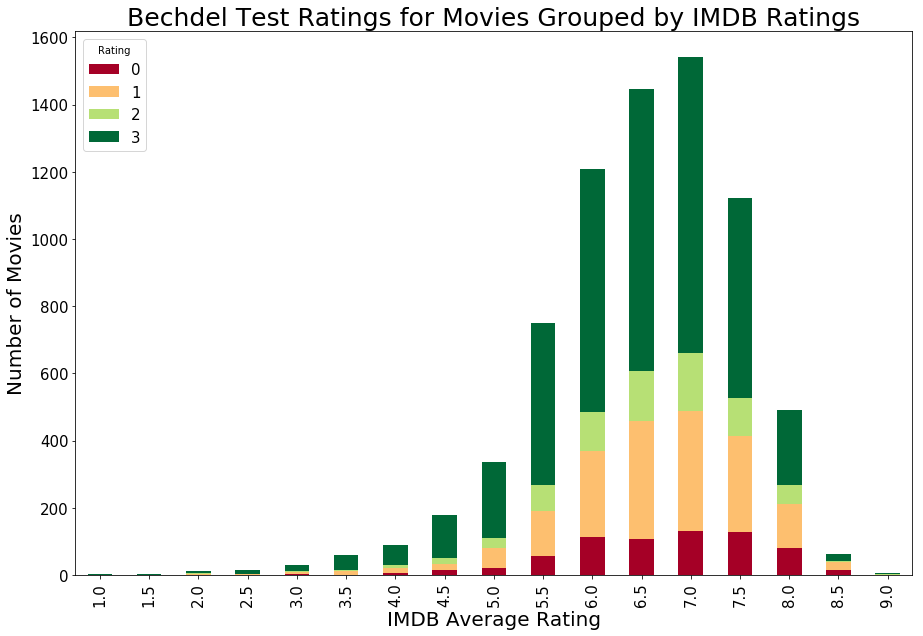

In [120]:
#plot all data as barchart
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
chart_bechdel_ratings = ratings_table.plot(kind='bar', stacked=True, colormap='RdYlGn', figsize = (15,10))
chart_bechdel_ratings.set_xlabel('IMDB Average Rating', size=20)
chart_bechdel_ratings.set_ylabel('Number of Movies', size=20)
chart_bechdel_ratings.set_title('Bechdel Test Ratings for Movies Grouped by IMDB Ratings', size=25)
plt.legend(loc=2, prop={'size': 15}, title='Rating')


chart_bechdel_ratings

In [30]:
fig1 = chart_bechdel_ratings.get_figure()
fig1.savefig('ratings_bechdel_imdb.png', bbox_inches='tight')

In [127]:
#plotting the figure above as a stacked percentage plot:
ratings_table_perc = ratings_table.copy()
ratings_table_perc.columns = ['0', '1', '2', '3']
ratings_table_perc['Total_Count'] = ratings_table_perc['0']+ratings_table_perc['1']+ratings_table_perc['2']+ratings_table_perc['3']

ratings_table_perc['0p'] = ratings_table_perc['0']/ratings_table_perc['Total_Count']*100
ratings_table_perc['1p'] = ratings_table_perc['1']/ratings_table_perc['Total_Count']*100
ratings_table_perc['2p'] = ratings_table_perc['2']/ratings_table_perc['Total_Count']*100
ratings_table_perc['3p'] = ratings_table_perc['3']/ratings_table_perc['Total_Count']*100

ratings_table_perc.head()

,0,1,2,3,Total_Count,0p,1p,2p,3p
IMDB_Ratings_Group,,,,,,,,,
1.0,0.0,0.0,0.0,2.0,2.0,0.000000,0.000000,0.000000,100.000000
1.5,0.0,0.0,0.0,4.0,4.0,0.000000,0.000000,0.000000,100.000000
2.0,1.0,2.0,2.0,8.0,13.0,7.692308,15.384615,15.384615,61.538462
2.5,0.0,3.0,0.0,12.0,15.0,0.000000,20.000000,0.000000,80.000000
3.0,3.0,6.0,3.0,17.0,29.0,10.344828,20.689655,10.344828,58.620690


In [128]:
ratings_table_perc.drop(['0', '1', '2', '3', 'Total_Count'], axis = 1, inplace = True)
ratings_table_perc.columns = ['0', '1', '2', '3']
ratings_table_perc.head()

,0,1,2,3
IMDB_Ratings_Group,,,,
1.0,0.000000,0.000000,0.000000,100.000000
1.5,0.000000,0.000000,0.000000,100.000000
2.0,7.692308,15.384615,15.384615,61.538462
2.5,0.000000,20.000000,0.000000,80.000000
3.0,10.344828,20.689655,10.344828,58.620690


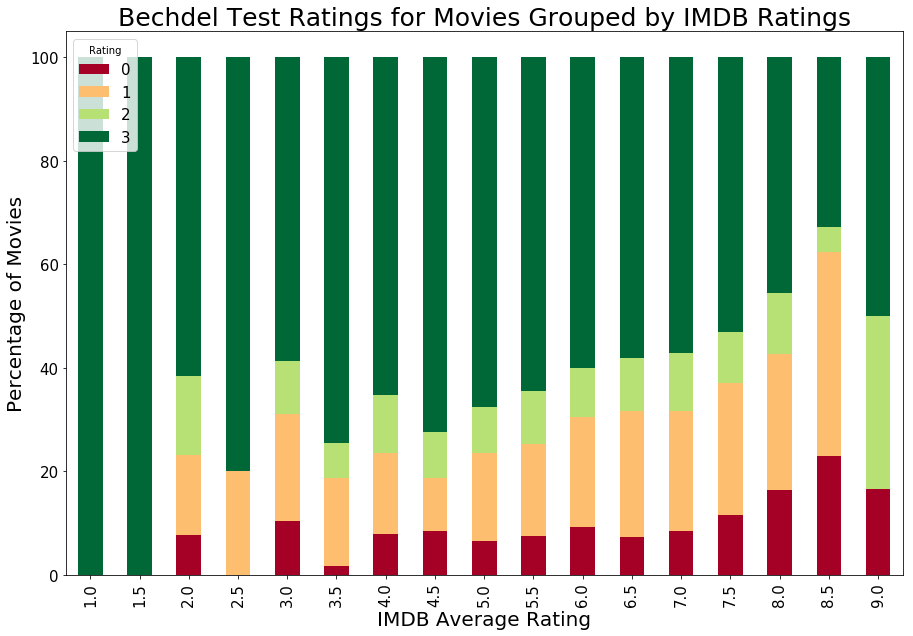

In [129]:
#plot all data as barchart
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
chart_bechdel_ratings_perc = ratings_table_perc.plot(kind='bar', stacked=True, colormap='RdYlGn', figsize = (15,10))
chart_bechdel_ratings_perc.set_xlabel('IMDB Average Rating', size=20)
chart_bechdel_ratings_perc.set_ylabel('Percentage of Movies', size=20)
chart_bechdel_ratings_perc.set_title('Bechdel Test Ratings for Movies Grouped by IMDB Ratings', size=25)
plt.legend(loc=2, prop={'size': 15}, title='Rating')


chart_bechdel_ratings_perc

In [132]:
fig1a = chart_bechdel_ratings_perc.get_figure()
fig1a.savefig('PERCENTAGE_ratings_bechdel_imdb.png', bbox_inches='tight')

In [31]:
#to better label the subplots, i need to see the ranges for number of votes in each of the subsets
print(ratings_df_01.numVotes.describe())
print(ratings_df_12.numVotes.describe())
print(ratings_df_23.numVotes.describe())
print(ratings_df_3.numVotes.describe())

count      6699.000000
mean      38040.620242
std       49055.262981
min           6.000000
25%        3656.500000
50%       15594.000000
75%       55174.500000
max      213247.000000
Name: numVotes, dtype: float64
count       340.000000
mean     273476.688235
std       39775.745896
min      213830.000000
25%      237736.250000
50%      269231.500000
75%      307440.500000
max      353997.000000
Name: numVotes, dtype: float64
count       141.000000
mean     411783.014184
std       39656.784741
min      355050.000000
25%      375872.000000
50%      401845.000000
75%      442768.000000
max      495032.000000
Name: numVotes, dtype: float64
count    1.690000e+02
mean     7.520927e+05
std      2.829599e+05
min      4.968890e+05
25%      5.590180e+05
50%      6.426030e+05
75%      8.550840e+05
max      1.973406e+06
Name: numVotes, dtype: float64


Text(0.5,0.98,'Bechdel Test Ratings for Movies Grouped by IMDB Ratings, Separated by Number of Votes')

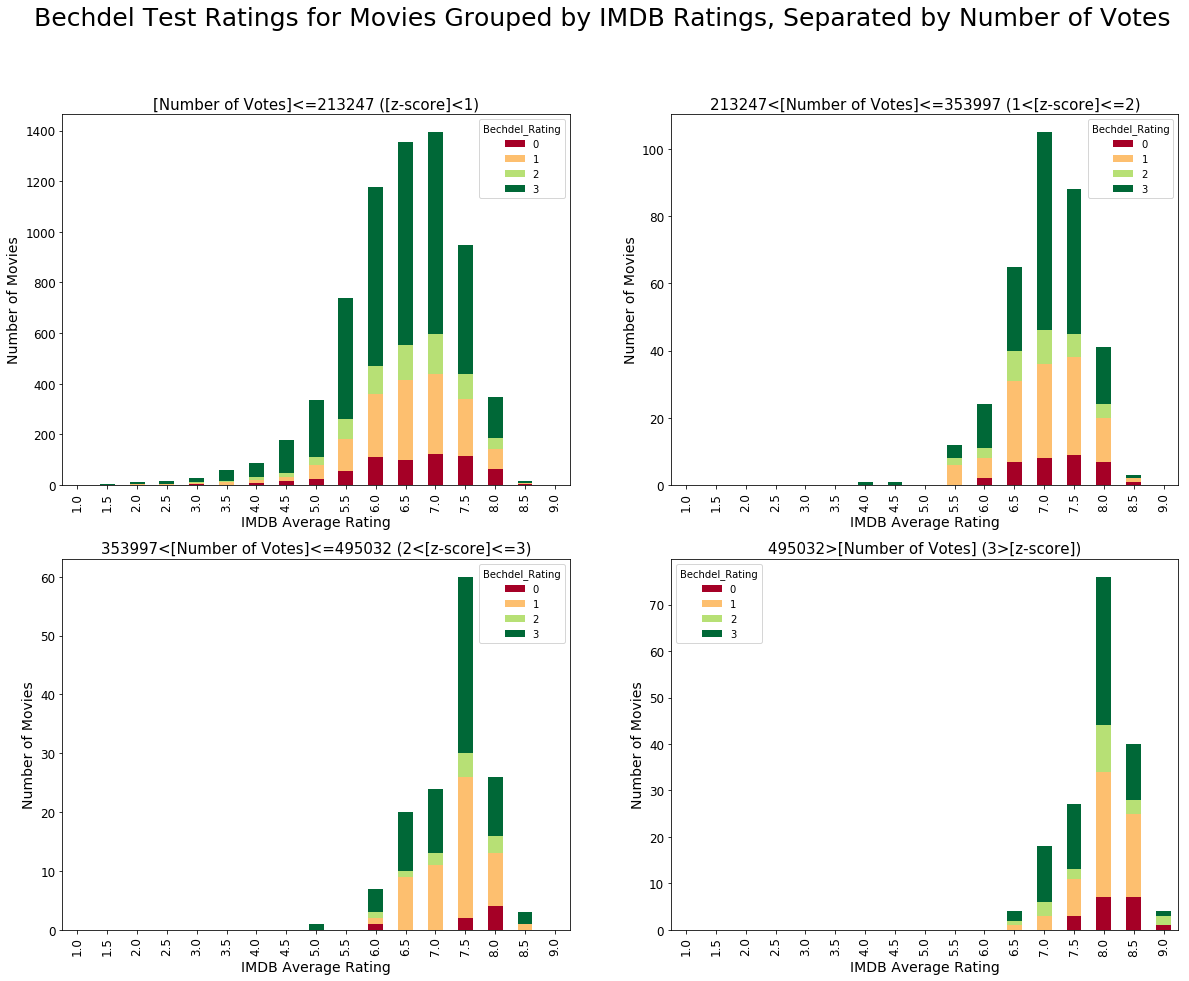

In [34]:
#create subplots for the data subsets

plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 


bar_fig, axes = plt.subplots(nrows=2, ncols=2)

chart_bechdel_ratings_01 = ratings_table_01.plot(kind='bar', stacked=True, colormap='RdYlGn', figsize=(20,15), ax=axes[0,0])
chart_bechdel_ratings_01.set_xlabel('IMDB Average Rating', size=14)
chart_bechdel_ratings_01.set_ylabel('Number of Movies', size=14)
chart_bechdel_ratings_01.set_title('[Number of Votes]<=213247 ([z-score]<1)', size=15)
chart_bechdel_ratings_12 = ratings_table_12.plot(kind='bar', stacked=True, colormap='RdYlGn', figsize=(20,15), ax=axes[0,1])
chart_bechdel_ratings_12.set_xlabel('IMDB Average Rating', size=14)
chart_bechdel_ratings_12.set_ylabel('Number of Movies', size=14)
chart_bechdel_ratings_12.set_title('213247<[Number of Votes]<=353997 (1<[z-score]<=2)', size=15)
chart_bechdel_ratings_23 = ratings_table_23.plot(kind='bar', stacked=True, colormap='RdYlGn', figsize=(20,15), ax=axes[1,0])
chart_bechdel_ratings_23.set_xlabel('IMDB Average Rating', size=14)
chart_bechdel_ratings_23.set_ylabel('Number of Movies', size=14)
chart_bechdel_ratings_23.set_title('353997<[Number of Votes]<=495032 (2<[z-score]<=3)', size=15)
chart_bechdel_ratings_3 = ratings_table_3.plot(kind='bar', stacked=True, colormap='RdYlGn', figsize=(20,15), ax=axes[1,1])
chart_bechdel_ratings_3.set_xlabel('IMDB Average Rating', size=14)
chart_bechdel_ratings_3.set_ylabel('Number of Movies', size=14)
chart_bechdel_ratings_3.set_title('495032>[Number of Votes] (3>[z-score])', size=15)

bar_fig.suptitle('Bechdel Test Ratings for Movies Grouped by IMDB Ratings, Separated by Number of Votes', size = 25)

In [35]:
bar_fig.savefig('subplots_bechdel_imdb_ratings.png', bbox_inches='tight')

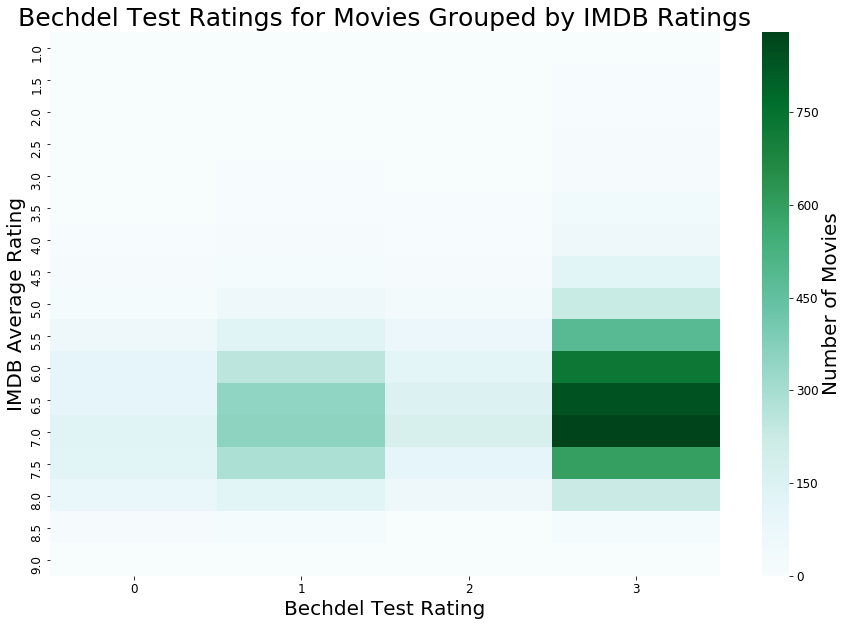

In [51]:
import seaborn as sns
plt.figure(figsize=(15,10))
bechdel_ratings_heat = sns.heatmap(ratings_table, cmap = 'BuGn', cbar_kws={'label': 'Number of Movies'})
bechdel_ratings_heat.set_xlabel('Bechdel Test Rating', size=20)
bechdel_ratings_heat.set_ylabel('IMDB Average Rating', size=20)
bechdel_ratings_heat.set_title('Bechdel Test Ratings for Movies Grouped by IMDB Ratings', size=25)
bechdel_ratings_heat.figure.axes[-1].yaxis.label.set_size(20)

In [37]:
fig2 = bechdel_ratings_heat.get_figure()
fig2.savefig('ratings_bechdel_imdb_heat.png', bbox_inches='tight')

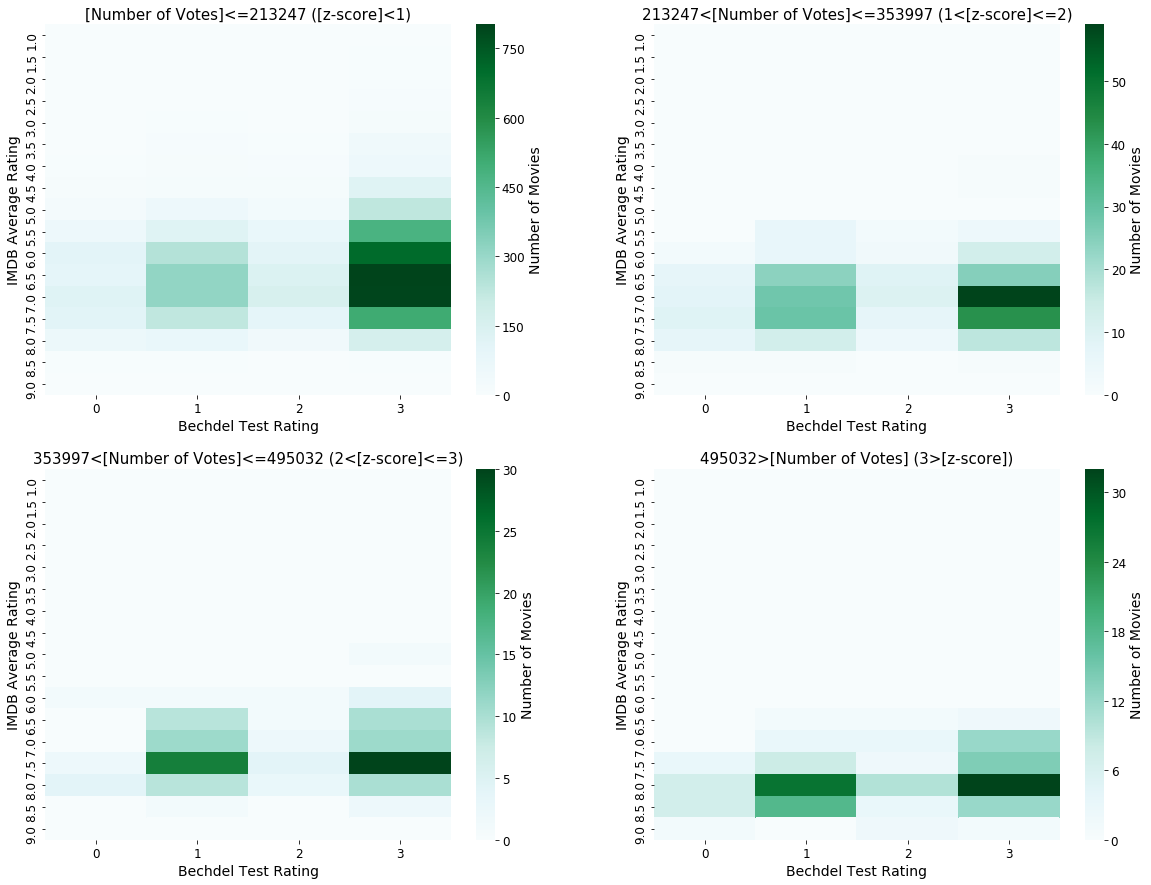

In [52]:
heat_fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,15))
bechdel_ratings_heat_01 = sns.heatmap(ratings_table_01, cmap = 'BuGn', cbar_kws={'label': 'Number of Movies'}, ax =axes[0,0])
bechdel_ratings_heat_01.set_xlabel('Bechdel Test Rating', size=14)
bechdel_ratings_heat_01.set_ylabel('IMDB Average Rating', size=14)
bechdel_ratings_heat_01.set_title('[Number of Votes]<=213247 ([z-score]<1)', size=15)
bechdel_ratings_heat_01.figure.axes[-1].yaxis.label.set_size(14)

bechdel_ratings_heat_12 = sns.heatmap(ratings_table_12, cmap = 'BuGn', cbar_kws={'label': 'Number of Movies'}, ax =axes[0,1])
bechdel_ratings_heat_12.set_xlabel('Bechdel Test Rating', size=14)
bechdel_ratings_heat_12.set_ylabel('IMDB Average Rating', size=14)
bechdel_ratings_heat_12.set_title('213247<[Number of Votes]<=353997 (1<[z-score]<=2)', size=15)
bechdel_ratings_heat_12.figure.axes[-1].yaxis.label.set_size(14)

bechdel_ratings_heat_23 = sns.heatmap(ratings_table_23, cmap = 'BuGn', cbar_kws={'label': 'Number of Movies'}, ax =axes[1,0])
bechdel_ratings_heat_23.set_xlabel('Bechdel Test Rating', size=14)
bechdel_ratings_heat_23.set_ylabel('IMDB Average Rating', size=14)
bechdel_ratings_heat_23.set_title('353997<[Number of Votes]<=495032 (2<[z-score]<=3)', size=15)
bechdel_ratings_heat_23.figure.axes[-1].yaxis.label.set_size(14)

bechdel_ratings_heat_3 = sns.heatmap(ratings_table_3, cmap = 'BuGn', cbar_kws={'label': 'Number of Movies'}, ax =axes[1,1])
bechdel_ratings_heat_3.set_xlabel('Bechdel Test Rating', size=14)
bechdel_ratings_heat_3.set_ylabel('IMDB Average Rating', size=14)
bechdel_ratings_heat_3.set_title('495032>[Number of Votes] (3>[z-score])', size=15)
bechdel_ratings_heat_3.figure.axes[-1].yaxis.label.set_size(14)

heat_fig.savefig('subplots_ratings_bechdel_imdb_heat.png', bbox_inches='tight')

In [53]:
#going to create a heatmap where the y-axis is the average bechdel rating, and the area is made up of numver of votes vs imdb ratings:
ratings_df["NumVotes_Groups"] =pd.cut(ratings_df['numVotes'], [100000*i for i in range(21)], labels=[str(100000*(i))+"-"+str(100000*(i+1)) for i in range(20)])

In [54]:
ratings_df.groupby('NumVotes_Groups').sum()

,Bechdel_Rating,IMDB_Rating,numVotes,IMDB_Ratings_Group,Movies_Count,numVotes_zScore
NumVotes_Groups,,,,,,
0-100000,13026,38541.7,133018140,37366.0,5873,-2075.927921
100000-200000,1511,5204.8,106689653,5053.5,753,369.086904
200000-300000,636,2233.6,75988877,2168.5,314,377.147768
300000-400000,324,1234.2,57744534,1205.5,167,323.404543
400000-500000,148,569.9,33431386,555.5,75,198.381994
500000-600000,121,495.4,34391674,485.5,63,211.355461
600000-700000,64,267.1,21817549,261.5,34,137.147211
700000-800000,37,163.5,14960371,160.5,20,95.745639
800000-900000,28,108.3,10966128,106.0,13,71.036017


In [55]:
ratings_numvotes_table = ratings_df.groupby(['NumVotes_Groups', 'IMDB_Ratings_Group'])['Bechdel_Rating', 'Movies_Count'].sum()

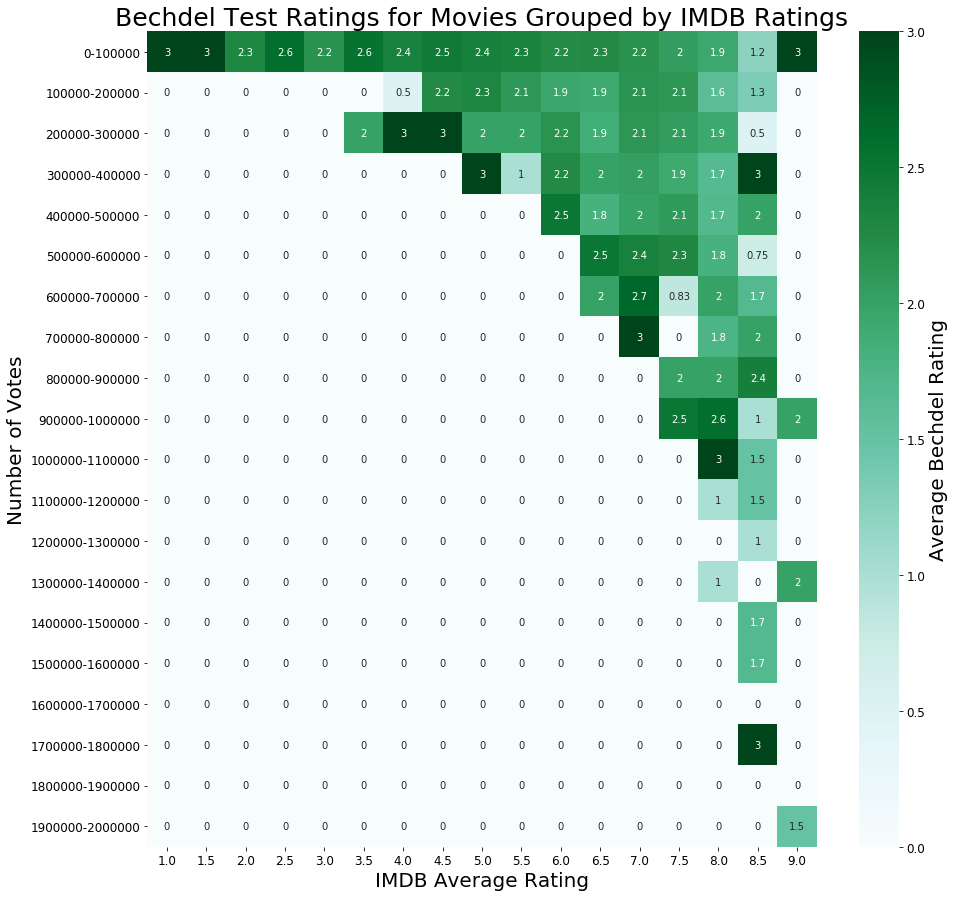

In [56]:
ratings_numvotes_table['Average_Bechdel_Rating']=ratings_numvotes_table.Bechdel_Rating/ratings_numvotes_table.Movies_Count
bechdel_avg = ratings_numvotes_table['Average_Bechdel_Rating'].unstack('IMDB_Ratings_Group').fillna(0.)
plt.figure(figsize=(15,15))
bechdel_avg_heat = sns.heatmap(bechdel_avg, cmap = 'BuGn', annot = True, cbar_kws={'label': 'Average Bechdel Rating'})
bechdel_avg_heat.set_xlabel('IMDB Average Rating', size=20)
bechdel_avg_heat.set_ylabel('Number of Votes', size=20)
bechdel_avg_heat.set_title('Bechdel Test Ratings for Movies Grouped by IMDB Ratings', size=25)
bechdel_avg_heat.figure.axes[-1].yaxis.label.set_size(20)

In [57]:
fig3 = bechdel_avg_heat.get_figure()
fig3.savefig('ratings_bechdel_imdb_numvotes_heat.png', bbox_inches='tight')

## Bechdel vs Runtime Analysis

In [164]:
#analysis of bechdel ratings vs runtime:
runtime_df.groupby('titleType').sum()

,bechdel_id,rating,release_yr,isAdult
titleType,,,,
movie,28852344,15528,14324254,1
short,628287,58,223696,0
tvEpisode,207549,77,72072,0
tvMiniSeries,114686,77,59932,0
tvMovie,889237,456,362788,0
tvSeries,229362,103,80344,0
tvShort,3290,3,1987,0
tvSpecial,13683,2,3990,0
video,556029,302,256800,1


In [165]:
#like the rest of analysis, we only care about movies and tvMovies, so we will filter out the rest. 
runtime_df = runtime_df[(runtime_df.titleType == 'movie')|(runtime_df.titleType == 'tvMovie')]
#check filter done properly:
runtime_df.groupby('titleType').sum()

,bechdel_id,rating,release_yr,isAdult
titleType,,,,
movie,28852344,15528,14324254,1
tvMovie,889237,456,362788,0


In [166]:
#also to make this more appropriate, i am going to remove the Adult film:
runtime_df = runtime_df[runtime_df.isAdult == 0]
#check filter done properly:
runtime_df.groupby('titleType').sum()

,bechdel_id,rating,release_yr,isAdult
titleType,,,,
movie,28845533,15525,14322282,0
tvMovie,889237,456,362788,0


In [167]:
runtime_df.head(10)


,bechdel_id,imdb_id,rating,title,release_yr,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
21,1349,tt0000574,1,"Story of the Kelly Gang, The",1906,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Biography,Crime,Drama"
23,2003,tt0002101,2,Cleopatra,1912,movie,Cleopatra,Cleopatra,0,1912,\N,100,"Drama,History"
27,4457,tt0003973,2,A Florida Enchantment,1914,movie,A Florida Enchantment,A Florida Enchantment,0,1914,\N,63,Comedy
28,1258,tt0004972,2,"Birth of a Nation, The",1915,movie,The Birth of a Nation,The Birth of a Nation,0,1915,\N,195,"Drama,History,War"
29,2008,tt0006745,3,Gretchen the Greenhorn,1916,movie,Gretchen the Greenhorn,Gretchen the Greenhorn,0,1916,\N,58,"Crime,Drama,Romance"
30,5944,tt0006864,0,Intolerance: Love&#39;s Struggle Throughout th...,1916,movie,Intolerance: Love's Struggle Throughout the Ages,Intolerance: Love's Struggle Throughout the Ages,0,1916,\N,163,"Drama,History"
31,7004,tt0007361,3,Snow White,1916,movie,Snow White,Snow White,0,1916,\N,63,"Fantasy,Romance"
33,1994,tt0008443,3,"Poor Little Rich Girl, The",1917,movie,The Poor Little Rich Girl,The Poor Little Rich Girl,0,1917,\N,65,"Comedy,Drama,Family"
34,2019,tt0008489,2,"Raffles, the Amateur Cracksman",1917,movie,"Raffles, the Amateur Cracksman","Raffles, the Amateur Cracksman",0,1917,\N,70,"Adventure,Crime,Romance"
35,1993,tt0008499,3,Rebecca of Sunnybrook Farm,1917,movie,Rebecca of Sunnybrook Farm,Rebecca of Sunnybrook Farm,0,1917,\N,78,"Comedy,Drama"


In [168]:
#now I will remove all of the columns that i don't need for the analysis
runtime_df.drop(['bechdel_id', 'imdb_id', 'title', 'release_yr', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult', 'startYear', 'endYear','genres'], axis = 1, inplace=True)
runtime_df.head(10)

,rating,runtimeMinutes
21,1,70
23,2,100
27,2,63
28,2,195
29,3,58
30,0,163
31,3,63
33,3,65
34,2,70
35,3,78


In [169]:
#check the range of runtimeMinutes:
runtime_df.runtimeMinutes.describe()

count     7358
unique     166
top         90
freq       260
Name: runtimeMinutes, dtype: object

In [170]:
#it appears that runtimeMinutes is not a number.  going to check the values further using groupby:
runtime_df.groupby('runtimeMinutes').sum()

,rating
runtimeMinutes,
100,472
101,374
102,342
103,371
104,383
105,402
106,310
107,326
108,303


In [171]:
#there appears to be 28 movies with no run-time.  I will be removing them as we cannot run the analysis with these titles:
runtime_df = runtime_df[runtime_df.runtimeMinutes != '\\N']

In [172]:
#turn runtimeMinutes into a number
str_to_num = lambda x: int(x)
runtime_df['Runtime_Minutes']= runtime_df.runtimeMinutes.apply(str_to_num)

In [173]:
runtime_df.Runtime_Minutes.describe()

count    7343.000000
mean      105.526352
std        26.387791
min        44.000000
25%        92.000000
50%       102.000000
75%       115.000000
max      1440.000000
Name: Runtime_Minutes, dtype: float64

In [174]:
#removing the runtimeMinutes column and adding another one to categorize Runtime_Minutes in increments
runtime_df['Minutes_Group']=pd.cut(runtime_df['Runtime_Minutes'], [50*i for i in range(30)], labels=[str(50*(i))+"-"+str(50*(i+1)) for i in range(29)])
runtime_df.head(20)

,rating,runtimeMinutes,Runtime_Minutes,Minutes_Group
21,1,70,70,50-100
23,2,100,100,50-100
27,2,63,63,50-100
28,2,195,195,150-200
29,3,58,58,50-100
30,0,163,163,150-200
31,3,63,63,50-100
33,3,65,65,50-100
34,2,70,70,50-100
35,3,78,78,50-100


In [175]:
#add a column for movies count
runtime_df['Movies_Count'] = 1
runtime_df.groupby('Minutes_Group').sum()

,rating,Runtime_Minutes,Movies_Count
Minutes_Group,,,
0-50,16,703,15
50-100,7434,307590,3429
100-150,8045,425517,3671
150-200,397,33068,199
200-250,49,5009,23
250-300,3,543,2
300-350,3,644,2
350-400,3,366,1
400-450,0,0,0


In [176]:
#There is an outlier of a movie with 1440 minutes.  It is significantly larger than the rest of run times.  I will remove it so that it does not skew the analysis:
runtime_df = runtime_df[runtime_df.Runtime_Minutes != 1440]
runtime_df.Runtime_Minutes.describe()

count    7342.000000
mean      105.344593
std        21.302391
min        44.000000
25%        92.000000
50%       102.000000
75%       115.000000
max       366.000000
Name: Runtime_Minutes, dtype: float64

In [177]:
#We will need to regroup the minutes by a smaller bin size:
runtime_df['Minutes_Group']=pd.cut(runtime_df['Runtime_Minutes'], [30+15*i for i in range(24)], labels=[str(30+15*(i))+"-"+str(30+15*(i+1)) for i in range(23)])
runtime_df.head(30)

,rating,runtimeMinutes,Runtime_Minutes,Minutes_Group,Movies_Count
21,1,70,70,60-75,1
23,2,100,100,90-105,1
27,2,63,63,60-75,1
28,2,195,195,180-195,1
29,3,58,58,45-60,1
30,0,163,163,150-165,1
31,3,63,63,60-75,1
33,3,65,65,60-75,1
34,2,70,70,60-75,1
35,3,78,78,75-90,1


In [178]:
runtime_df.groupby('Minutes_Group').sum()

,rating,Runtime_Minutes,Movies_Count
Minutes_Group,,,
30-45,6,179,4
45-60,56,2076,38
60-75,383,14563,209
75-90,2938,116805,1365
90-105,5939,259654,2653
105-120,3829,196651,1749
120-135,1706,100002,787
135-150,638,43880,310
150-165,236,18566,118


In [179]:
runtime_table = runtime_df.groupby(['Minutes_Group','rating'])['Movies_Count'].sum().unstack('rating')
runtime_table.head(10)

rating,0,1,2,3
Minutes_Group,,,,
30-45,2.0,NaN,NaN,2.0
45-60,13.0,9.0,1.0,15.0
60-75,47.0,40.0,23.0,99.0
75-90,169.0,272.0,106.0,818.0
90-105,210.0,559.0,272.0,1612.0
105-120,129.0,420.0,191.0,1009.0
120-135,53.0,201.0,94.0,439.0
135-150,32.0,80.0,36.0,162.0
150-165,10.0,38.0,12.0,58.0


In [180]:
runtime_table=runtime_table.fillna(0.)

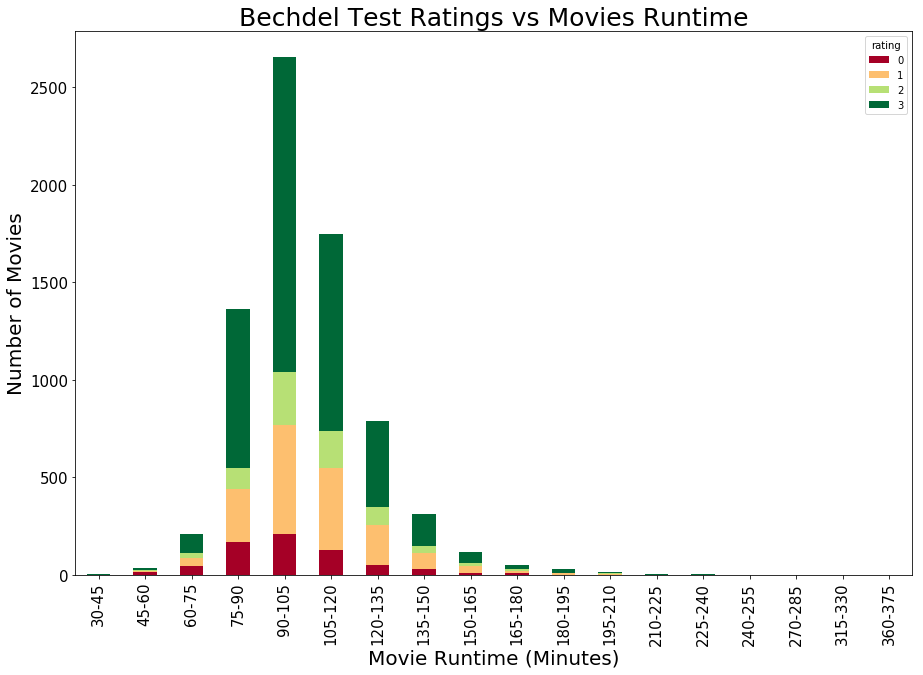

In [157]:
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
chart_bechdel_runtime = runtime_table.plot(kind='bar', stacked=True, colormap='RdYlGn', figsize = (15,10))
chart_bechdel_runtime.set_xlabel('Movie Runtime (Minutes)', size=20)
chart_bechdel_runtime.set_ylabel('Number of Movies', size=20)
chart_bechdel_runtime.set_title('Bechdel Test Ratings vs Movies Runtime', size=25)

chart_bechdel_runtime

In [79]:
fig4 = chart_bechdel_runtime.get_figure()
fig4.savefig('bechdel_runtime.png', bbox_inches='tight')

In [181]:
runtime_table_percent = runtime_table
runtime_table_percent.columns

Int64Index([0, 1, 2, 3], dtype='int64', name='rating')

In [182]:
runtime_table_percent.columns = ['0','1','2','3']

In [183]:
runtime_table_percent['Percent Pass'] = runtime_table_percent['3']/(runtime_table_percent['0']+runtime_table_percent['1']+runtime_table_percent['2']+runtime_table_percent['3'])*100

In [184]:
runtime_table_percent.drop(['0','1','2','3'], axis = 1, inplace = True)


In [185]:
runtime_table_percent.head(20)

,Percent Pass
Minutes_Group,
30-45,50.000000
45-60,39.473684
60-75,47.368421
75-90,59.926740
90-105,60.761402
105-120,57.690109
120-135,55.781449
135-150,52.258065
150-165,49.152542


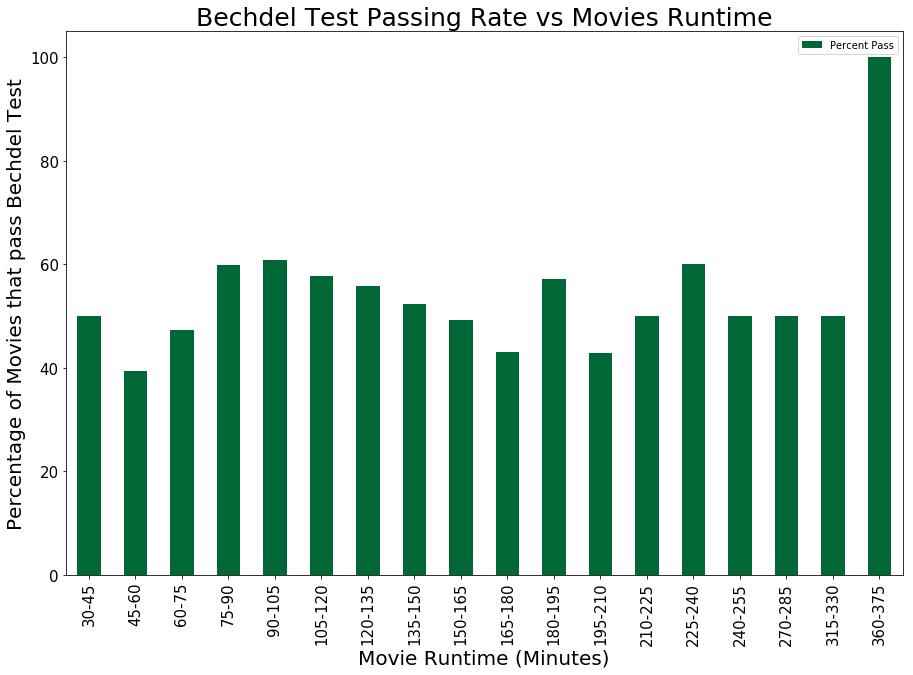

In [186]:
chart_bechdel_runtime_percent = runtime_table_percent.plot(kind='bar', stacked=True, colormap='RdYlGn_r', figsize = (15,10))
chart_bechdel_runtime_percent.set_xlabel('Movie Runtime (Minutes)', size=20)
chart_bechdel_runtime_percent.set_ylabel('Percentage of Movies that pass Bechdel Test', size=20)
chart_bechdel_runtime_percent.set_title('Bechdel Test Passing Rate vs Movies Runtime', size=25)

chart_bechdel_runtime_percent

In [187]:
fig4 = chart_bechdel_runtime_percent.get_figure()
fig4.savefig('bechdel_runtime_percent.png', bbox_inches='tight')